In [1]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset and creating dataframe
startup_df = pd.read_csv("50_Startups.csv")

In [3]:
# printing the dataframe created above
print(startup_df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [4]:
# view the shape of dataframe i.e. number of rows and columns
shape = startup_df.shape
print(f"Dataset contains {shape[0]} rows and {shape[1]} colums")

Dataset contains 50 rows and 5 colums


In [5]:
# view statistical details of dataset
print(startup_df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [6]:
# defining x(independent variables) and y(dependent variables) for the model
x=pd.DataFrame(startup_df.iloc[:,:-1])
y=startup_df.iloc[:,4]

In [7]:
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [8]:
# perform one-hot encoding
#from sklearn.preprocessing import OneHotEncoder

In [9]:
# ohe=OneHotEncoder(sparse=False)
# x=ohe.fit_transform(startup_df[['State']])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(),[3])], remainder='passthrough') # encoding the catagorical data using onehotencoding
x = ct.fit_transform(x)

In [11]:
#x.loc[x["State"] == "California","State"] = 0

In [12]:
#x.loc[x["State"] == "New York","State"] = 1

In [13]:
#x.loc[x["State"] == "Florida","State"] = 2

In [14]:
print(pd.DataFrame(x))

      0    1    2          3          4          5
0   0.0  0.0  1.0  165349.20  136897.80  471784.10
1   1.0  0.0  0.0  162597.70  151377.59  443898.53
2   0.0  1.0  0.0  153441.51  101145.55  407934.54
3   0.0  0.0  1.0  144372.41  118671.85  383199.62
4   0.0  1.0  0.0  142107.34   91391.77  366168.42
5   0.0  0.0  1.0  131876.90   99814.71  362861.36
6   1.0  0.0  0.0  134615.46  147198.87  127716.82
7   0.0  1.0  0.0  130298.13  145530.06  323876.68
8   0.0  0.0  1.0  120542.52  148718.95  311613.29
9   1.0  0.0  0.0  123334.88  108679.17  304981.62
10  0.0  1.0  0.0  101913.08  110594.11  229160.95
11  1.0  0.0  0.0  100671.96   91790.61  249744.55
12  0.0  1.0  0.0   93863.75  127320.38  249839.44
13  1.0  0.0  0.0   91992.39  135495.07  252664.93
14  0.0  1.0  0.0  119943.24  156547.42  256512.92
15  0.0  0.0  1.0  114523.61  122616.84  261776.23
16  1.0  0.0  0.0   78013.11  121597.55  264346.06
17  0.0  0.0  1.0   94657.16  145077.58  282574.31
18  0.0  1.0  0.0   91749.16  1

In [15]:
#print(ohe.categories_)

In [16]:
# making column tranform
#from sklearn.compose import make_column_transformer

In [17]:
# col_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['State']),remainder='passthrough')
# x = col_trans.fit_transform(x)
# print(x)

In [18]:
# Split the Dataset into Train Set and Test Set
x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(x),y,test_size=0.2,random_state=0)

In [19]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (40, 6)
X_test: (10, 6)
Y_train: (40,)
Y_test: (10,)


In [20]:
x_test.head()

,0,1,2,3,4,5
28,0.0,1.0,0.0,66051.52,182645.56,118148.20
11,1.0,0.0,0.0,100671.96,91790.61,249744.55
10,0.0,1.0,0.0,101913.08,110594.11,229160.95
41,0.0,1.0,0.0,27892.92,84710.77,164470.71
2,0.0,1.0,0.0,153441.51,101145.55,407934.54


In [21]:
# train the model
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [22]:
# predict the result
yhat=linreg.predict(x_test)
print(yhat)

[103015.20159797 132582.27760814 132447.73845174  71976.09851259
 178537.48221054 116161.24230166  67851.69209677  98791.73374688
 113969.43533013 167921.06569549]


In [23]:
# evaluate the model
Accuracy=r2_score(y_test,yhat)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 93.47


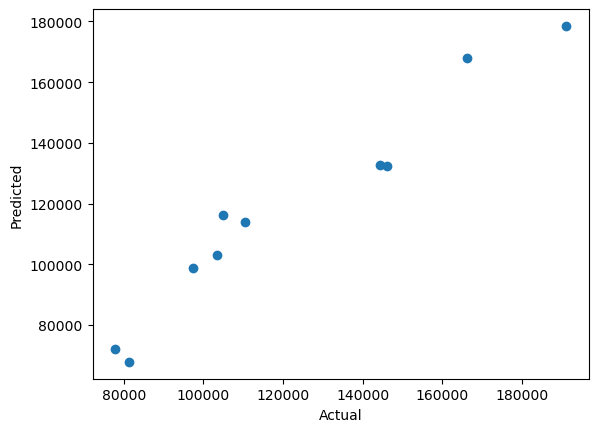

In [24]:
# ploting scatter plot between predicted and actual value
plt.scatter(y_test,yhat);
plt.xlabel('Actual');
plt.ylabel('Predicted');

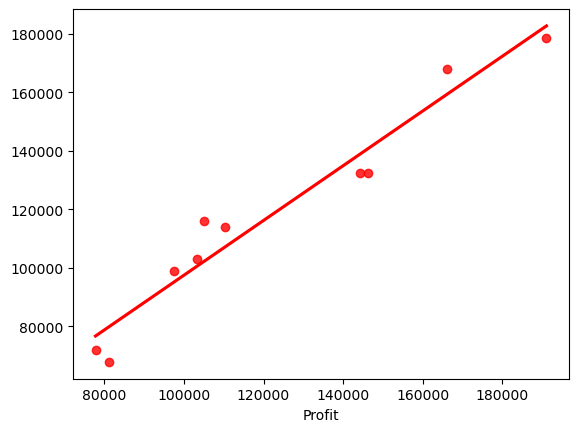

In [25]:
# regression plot
sns.regplot(x=y_test,y=yhat,ci=None,color ='red');

In [26]:
print(linreg.coef_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
